In [1]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from numpy import sqrt

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
cH0mpc = c/H0kmsmpc   # c/H0 in Mpc  (the km/s cancel out in the numerator and denominator)
cH0Glyr = cH0mpc * 3.262 / 1000 #c/H0 in billions of light years.  There are 3.262 light year / parsec

# Write a function for the integrand, i.e. $1/E(z)$,
def Ezinv(z, om, ol):
    ok = 1.0-om-ol
    Ez = np.sqrt(om * (1+z)**3 + ok * (1+z)**2 + ol) # Put your code here!  This is not right until you change it.
    return 1.0/Ez

# Choose the redshift (e.g. z=0.3)
z=0.3

# Choose a cosmology
om, ol = 0.3, 0.7

# Calcuate the integral (just the int_0^z(dz/E(z)) part, which givers xx=R0*X/(c/H_0)):
xx = integrate.quad(Ezinv,0,z,args=(om,ol))[0] 

# Sub in the required constants to get the comoving distance R_0*X
R0X = xx*cH0Glyr # Distance in Glyr

print('Comoving distance to a galaxy at z=%.3f is %.2f Glyr (this is not right until you have put the correct equation for Ez above)'%(z,R0X))

Comoving distance to a galaxy at z=0.300 is 3.90 Glyr (this is not right until you have put the correct equation for Ez above)


In [2]:
# Insert your code here

distance_at_emission = (1/(1 + z)) * R0X


# Remember to write print statements to see the answers. 

print('Distance to a galaxy at z=%.3f when the light we see was emitted is %.2f Glyr'%distance_at_emission)

TypeError: not enough arguments for format string

zarr= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


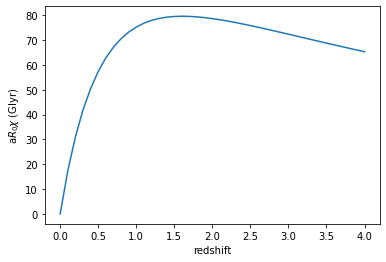

In [3]:
# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1 # Make this finer to make the plot smoother
zarr = np.arange(zstart,zstop,zstep)
print('zarr=',zarr)

# Now add your code to calculate distance vs redshift and then plot it.  
xarr = np.zeros(len(zarr))
for i, z in enumerate(zarr):
    
    
    # Calcuate the integral (just the int_0^z(dz/E(z)) part, which givers xx=R0*X/(c/H_0)):
    xx = integrate.quad(Ezinv,0,z,args=(om,ol))[0] 

    # Sub in the required constants to get the comoving distance R_0*X
    R0X = xx*cH0Glyr # Distance in Glyr
    
    xarr[i] = (1/(1 + z)) * R0X
    
    
    
# Sub in the required constants to get the comoving distance R_0*X
R0X = xarr*cH0Glyr # Distance in Glyr

plt.plot(zarr,R0X)
plt.xlabel('redshift')
plt.ylabel('a$R_0\chi$ (Glyr)') 
plt.show()

In [4]:
# You may find this function useful to calculate the perpendicular comoving distance R0*Sk(X)
    # Corrects the comoving distance, xx, for curvature, ok.
    # Result is perpendicular comoving distance / (c/H0)  
    # i.e. it's the distance to use in angular diameter and luminosity distance
def Sk(xx, ok):
    if ok < 0.0:
        dk = np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        dk = np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        dk = xx
    return dk
# This returns a value for R_0S_k(\chi) that you multiply by c/H_0 to give it units.

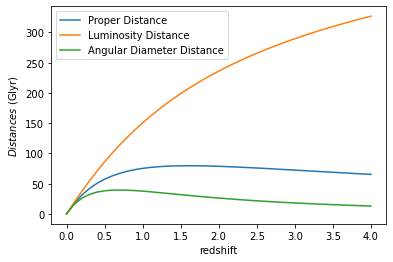

In [6]:
ok = 1.0-om-ol
DD = R0X                          # Proper distance
DL = Sk(xarr,ok)*(1+zarr)*cH0Glyr # Luminosity distance
DA = (Sk(xarr,ok)/(1+zarr))*cH0Glyr            # Angular diameter distance

plt.plot(zarr,DD,label='Proper Distance')
plt.plot(zarr,DL,label='Luminosity Distance')
plt.plot(zarr,DA,label='Angular Diameter Distance')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('$Distances$ (Glyr)')
plt.show()